## HD 2039

Radial velocity data for HD2039 were obtained from 
[Tinney et al.(2003)](./references.md).

Demonstration:
1. RadialVelocity Model
2. Circular Priors
3. NestedSampler
4. Evidence

Author: Do Kester


We need to import some classes

In [1]:
import numpy as numpy
import math

from astropy.io import ascii
from BayesicFitting import RadialVelocityModel
from BayesicFitting import PolynomialModel
from BayesicFitting import CircularUniformPrior
from BayesicFitting import StellarOrbitModel
from BayesicFitting import BasicSplinesModel
from BayesicFitting import Fitter

from BayesicFitting import NestedSampler
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
from BayesicFitting import Tools
import matplotlib.pyplot as plt



In [2]:
#%matplotlib osx

Read the data

In [3]:
tbl = ascii.read( "data/HD2039-Tinney.dat" )
#print( tbl )
jd = tbl['JDa'].data
rv = tbl['RVa'].data
er = tbl['Uncertainty'].data
wgt = None
#wgt = 100.0 / numpy.square( er )
#print( wgt )

We define a radial velocity model. It has 5 parameters: eccentricity, amplitude, period, phase of periastron, longitude of periastron.
The phase parameters both get a CircularUniformPrior.
We need to add a constant for the systemic velocity of the system.

In [4]:
twopi = 2 * math.pi
rvm = RadialVelocityModel( )
lolim = [0.0, 0.0, 1000.0]
hilim = [0.9, 200.0, 1500.0]
rvm.setLimits( lowLimits=lolim, highLimits=hilim )
rvm.setPrior( 3, prior=CircularUniformPrior(), limits=[0,twopi] )
rvm.setPrior( 4, prior=CircularUniformPrior(), limits=[0,twopi] )
#Tools.printclass( rvm )
pm = PolynomialModel( 0 )
pm.setLimits( lowLimits=[0], highLimits=[200] )
#sm *= hm
mdl = pm + rvm
print( mdl )


Polynomial: f( x:p ) = p_0 +
RadialVelocity 


Fit all parameters of
  Polynomial: f( x:p ) = p_0 +
  RadialVelocity 
Using a Gauss error distribution with unknown scale
Moving the walkers with   GalileanEngine  ChordEngine
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Iteration     logZ        H       LowL     npar
   12803      -165.     16.8      -145.      7 
Parameters   [    2.661    0.702  134.997 1238.081    5.229    5.827   13.454]
Engines              success     reject     failed       best      calls
GalileanEngine        114404      33047      34358          0      12803
ChordEngine            89359     139798          0          0      12803
Calls to LogL         444013   to dLogL      33047
Samples       13303
Evidence       -71.586 +-      0.080


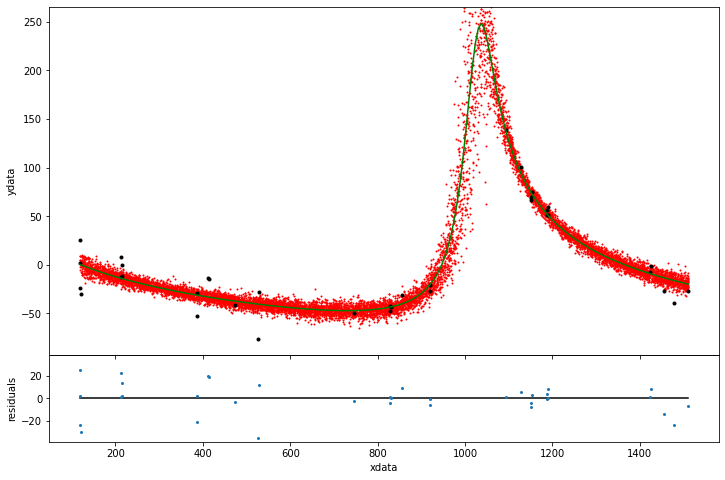

In [5]:
# define NestedSampler
ns = NestedSampler( jd, mdl, rv, weights=wgt, seed=1301 )
#ns.ensemble = 500
# set limits on the noise scale of the distribution
ns.distribution.setLimits( [0.01,100] )

# run NestedSampler
evi = ns.sample( plot=True )


In [6]:
sl = ns.samples
par = sl.parameters
std = sl.stdevs
print( "            offset   eccentr   amplit   period    phase    time ")
print( "params  ", fmt( par, max=None ) )
print( "stdevs  ", fmt( std, max=None ) )
pal = par.copy()
stl = std.copy()
pal[4] *= 180 / math.pi
pal[5] *= 0.5 * pal[2] / math.pi
stl[4] *= 180 / math.pi
stl[5] *= 0.5 * pal[2] / math.pi
print( "params  ", fmt( pal, max=None ) )
print( "stdevs  ", fmt( stl, max=None ) )
print( "scale   ", fmt( sl.scale ), " +-", fmt( sl.stdevScale ) )
print( "evidence", fmt( evi ) )

            offset   eccentr   amplit   period    phase    time 
params   [    5.079    0.731  157.930 1251.846    5.157    5.841]
stdevs   [    3.249    0.050   28.188   52.680    0.229    0.070]
params   [    5.079    0.731  157.930 1251.846  295.455  146.825]
stdevs   [    3.249    0.050   28.188   52.680   13.123    1.759]
scale       14.890  +-     2.018
evidence   -71.586


There were rumours that there could be 2 planets. We add another RadialVelocityModel and try again.

In [7]:
twopi = 2 * math.pi
rvm1 = RadialVelocityModel( )
lolim1 = [0.0, 0.0, 1000.0]
hilim1 = [0.9, 200.0, 1500.0]
rvm1.setLimits( lowLimits=lolim, highLimits=hilim )
rvm1.setPrior( 3, prior=CircularUniformPrior(), limits=[0,twopi] )
rvm1.setPrior( 4, prior=CircularUniformPrior(), limits=[0,twopi] )
#Tools.printclass( rvm )
rvm2 = RadialVelocityModel( )
lolim2 = [0.0, 0.0, 10.0]
hilim2 = [0.9, 200.0, 1000.0]
rvm2.setLimits( lowLimits=lolim2, highLimits=hilim2 )
rvm2.setPrior( 3, prior=CircularUniformPrior(), limits=[0,twopi] )
rvm2.setPrior( 4, prior=CircularUniformPrior(), limits=[0,twopi] )
#Tools.printclass( rvm2 )
pm = PolynomialModel( 0 )
pm.setLimits( lowLimits=[0], highLimits=[200] )
#sm *= hm
mdl2 = pm + rvm1 + rvm2
print( mdl2 )



Polynomial: f( x:p ) = p_0 +
RadialVelocity  +
RadialVelocity 


Fit all parameters of
  Polynomial: f( x:p ) = p_0 +
  RadialVelocity  +
  RadialVelocity 
Using a Gauss error distribution with unknown scale
Moving the walkers with   GalileanEngine  ChordEngine
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>>>>>>>>>>>>>>>>>>
Iteration     logZ        H       LowL     npar
   16878      -169.     21.3      -141.     12 
Parameters   [   10.619    0.748  193.523 1163.020    5.471    5.849    0.712   14.880  137.319    5.749    3.928
                 10.958]
Engines              success     reject     failed       best      calls
GalileanEngine        130285      42012      61983          0      16878
ChordEngine           117954     257217          0          0      16878
Calls to LogL         651463   to dLogL      42012
Samples       17378
Evidence       -73.420 +-      0.090


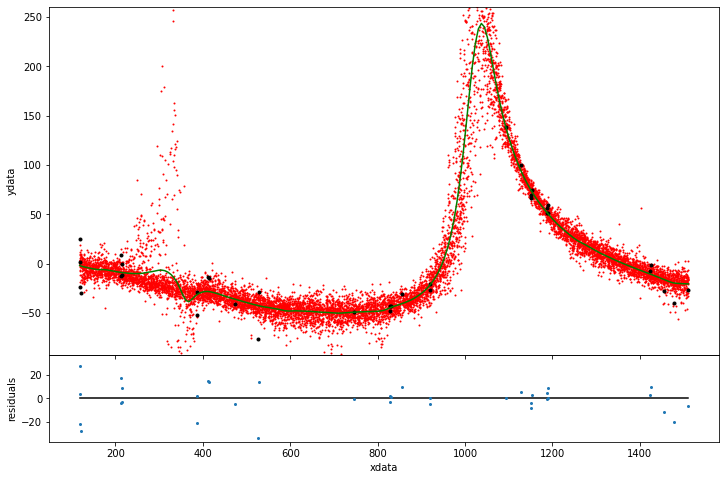

In [8]:
# define NestedSampler
ns1 = NestedSampler( jd, mdl2, rv, weights=wgt, seed=1301 )
#ns1.ensemble = 500
# set limits on the noise scale of the distribution
ns1.distribution.setLimits( [0.01,100] )

# run NestedSampler
evi1 = ns1.sample( plot=True )



In [9]:
pars2 = ns1.parameters
stdv2 = ns1.stdevs
print( fmt( par, max=None ) )
print( fmt( std, max=None ) )
print( fmt( pars2, max=None ) )
print( fmt( stdv2, max=None ) )

[    5.079    0.731  157.930 1251.846    5.157    5.841]
[    3.249    0.050   28.188   52.680    0.229    0.070]
[    5.426    0.764  167.138 1294.349    4.437    5.213    0.532   34.592  560.315    3.884    4.182]
[    3.915    0.064   28.559  105.396    1.473    1.267    0.218   49.488  257.522    1.463    1.446]


The evidence did not go up. So the 2 planet model is not better. 

We plot both models in one figure (green for 1 planet; red for 2). 
Obviously there is little in the data that supports 2 planets.

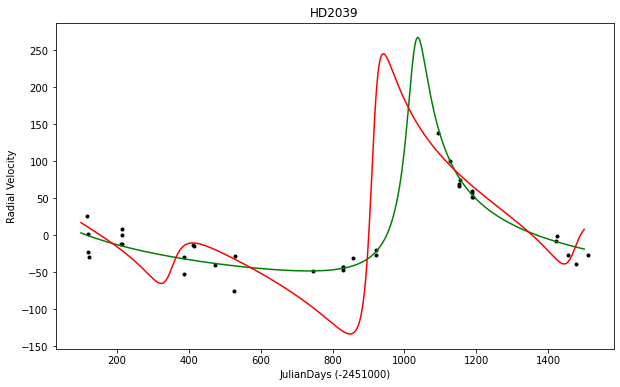

In [10]:
plt.figure( "HD2039-1", figsize=[10,6] )
plt.plot( jd, rv, 'k. ' )

xx = numpy.linspace( 100, 1500, 1401, dtype=float )
plt.plot( xx, mdl.result( xx, par ), 'g-' )
plt.plot( xx, mdl2.result( xx, ns1.parameters ), 'r-' )
plt.xlabel( "JulianDays (-2451000)")
plt.ylabel( "Radial Velocity")
plt.title( "HD2039" )
plt.savefig( "HD2039-1.png" )
#plt.show()

Plot also the maximum likelihood solution. It is the ultimate fit.

However, look hoow much different it is from the mean posterior

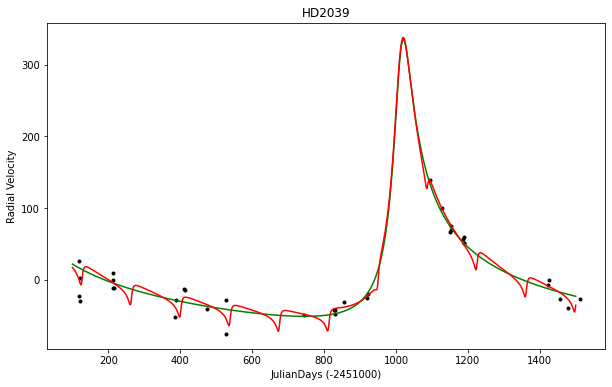

In [11]:
plt.figure( "HD2039-ml", figsize=[10,6] )
plt.plot( jd, rv, 'k. ' )

parml = ns1.samples[-1].parameters
xx = numpy.linspace( 100, 1500, 1401, dtype=float )
plt.plot( xx, mdl.result( xx, parml[:6] ), 'g-' )
plt.plot( xx, mdl2.result( xx, parml ), 'r-' )
plt.xlabel( "JulianDays (-2451000)")
plt.ylabel( "Radial Velocity")
plt.title( "HD2039" )
plt.savefig( "HD2039-ml.png" )
plt.show()

In [12]:
som = StellarOrbitModel()
k1 = [0,1,2,3,6]
sompar = som.parameters
sompar[k1] = pars2[1:6]

#print( sompar )
yy = som.result( xx, sompar )
xm1 = yy[:,0] * numpy.sin( yy[:,1] )
ym1 =-yy[:,0] * numpy.cos( yy[:,1] )

print( fmt( xm1, tail=4 ) )
print( fmt( ym1, tail=4 ) ) 

sompar[k1] = pars2[6:]

#print( sompar )
yy = som.result( xx, sompar )
xm2 = yy[:,0] * numpy.sin( yy[:,1] )
ym2 =-yy[:,0] * numpy.cos( yy[:,1] )

print( fmt( xm2, tail=4 ) )
print( fmt( ym2, tail=4 ) ) 



[  266.223  266.279  266.333  266.387  266.439 ...  265.409  265.339  265.267  265.194]
[   90.441   90.789   91.136   91.483   91.830 ...  123.645  123.942  124.238  124.534]
[   48.428   48.479   48.529   48.577   48.623 ...  -16.765  -16.631  -16.486  -16.331]
[  -20.087  -19.874  -19.660  -19.445  -19.230 ...  -11.088  -11.676  -12.258  -12.832]


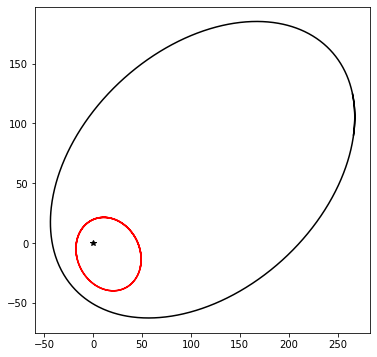

In [13]:
plt.figure( "orbit", figsize=[6,6] )

plt.plot( xm1, ym1, 'k-' )
plt.plot( xm2, ym2, 'r-' )
plt.plot( [0], [0], 'k*' )
plt.show()